In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('seaborn-whitegrid')
import seaborn as sns

In [3]:
train = pd.read_csv('C:/Users/47009To/KaggleDatasets/ShelterAnimal/Data/train.csv', index_col=[0])
test = pd.read_csv('C:/Users/47009To/KaggleDatasets/ShelterAnimal/Data/test.csv', index_col=[0])

In [4]:
train.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [5]:
outcome_stat = train.groupby('OutcomeType')['Name'].count().sort_values()

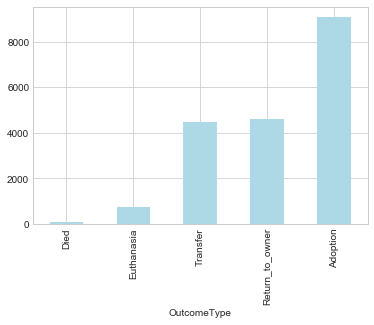

In [6]:
outcome_stat.plot(kind='bar', color='#ADD8E6')

In [7]:
outcome_stat / train.shape[0] * 100

OutcomeType
Died                0.288077
Euthanasia          2.768529
Transfer           16.824423
Return_to_owner    17.333234
Adoption           34.011748
Name: Name, dtype: float64

In [8]:
train.isnull().sum()

Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26729 entries, A671945 to A706629
Data columns (total 9 columns):
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(9)
memory usage: 2.0+ MB


In [10]:
train['Breed'].value_counts().head(20)

Domestic Shorthair Mix       8810
Pit Bull Mix                 1906
Chihuahua Shorthair Mix      1766
Labrador Retriever Mix       1363
Domestic Medium Hair Mix      839
German Shepherd Mix           575
Domestic Longhair Mix         520
Siamese Mix                   389
Australian Cattle Dog Mix     367
Dachshund Mix                 318
Boxer Mix                     245
Miniature Poodle Mix          233
Border Collie Mix             229
Australian Shepherd Mix       163
Catahoula Mix                 157
Rat Terrier Mix               157
Jack Russell Terrier Mix      146
Yorkshire Terrier Mix         143
Domestic Shorthair            143
Chihuahua Longhair Mix        142
Name: Breed, dtype: int64

In [11]:
train[train['Breed'].str.contains('Mix')].shape[0] / train.shape[0] * 100

83.42249990646863

In [12]:
train['AgeuponOutcome'].value_counts()

1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
7 months      288
9 years       288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
6 days         50
4 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: AgeuponOutcome, dtype: int64

In [13]:
train['AgeList'] = train['AgeuponOutcome'].str.split(' ')
train['AgeList'].head()

AnimalID
A671945     [1, year]
A656520     [1, year]
A686464    [2, years]
A683430    [3, weeks]
A667013    [2, years]
Name: AgeList, dtype: object

In [14]:
train.dropna(axis=0, subset=['AgeuponOutcome'], inplace=True)
train.isnull().sum()

Name               7673
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome        0
Breed                 0
Color                 0
AgeList               0
dtype: int64

In [15]:
train['NumberOfPeriod'] = train['AgeuponOutcome'].apply(lambda x: x.split(' ')[0])
train['Period'] = train['AgeuponOutcome'].apply(lambda x: x.split(' ')[1])
train.drop('AgeList', axis=1, inplace=True)
train.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,NumberOfPeriod,Period
AnimalID,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,year
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,year
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2,years
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,3,weeks
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2,years


In [16]:
def get_days(row):
    if row['Period'] == 'year' or row['Period'] == 'years':
        return int(row['NumberOfPeriod']) * 365
    elif row['Period'] == 'months' or row['Period'] == 'month':
        return int(row['NumberOfPeriod']) * 30.5
    elif row['Period'] == 'weeks' or row['Period'] == 'week':
        return int(row['NumberOfPeriod']) * 7
    else:
        return int(row['NumberOfPeriod'])
    
train['NumberOfDays'] = train.apply(get_days, axis=1)
train['NumberOfDays'].head()

AnimalID
A671945    365.0
A656520    365.0
A686464    730.0
A683430     21.0
A667013    730.0
Name: NumberOfDays, dtype: float64

In [17]:
train.drop('AgeuponOutcome', axis=1, inplace=True)
train.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,NumberOfPeriod,Period,NumberOfDays
AnimalID,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,year,365.0
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,year,365.0
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,Pit Bull Mix,Blue/White,2,years,730.0
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,3,weeks,21.0
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,2,years,730.0


In [18]:
train['AnimalType'].value_counts()

Dog    15594
Cat    11117
Name: AnimalType, dtype: int64

In [19]:
train['Bin'], bin_edge = pd.cut(train['NumberOfDays'], bins=73, labels=False, retbins=True)
train.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,NumberOfPeriod,Period,NumberOfDays,Bin
AnimalID,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,year,365.0,3
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,year,365.0,3
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,Pit Bull Mix,Blue/White,2,years,730.0,7
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,3,weeks,21.0,0
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,2,years,730.0,7


In [81]:
cross = pd.crosstab(index=train['Bin'], columns=train['OutcomeType'])
print(cross)

OutcomeType  Adoption  Died  Euthanasia  Return_to_owner  Transfer
Bin                                                               
0                8682   169         830             2162      7758
1                 942     8         219              979       746
2                 505     3         147              608       399
3                 317     4          92              416       238
4                 194    10         107              269       154
5                  71     2          69              155        63
6                  41     1          51              117        30
7                  16     0          28               61        16
8                   1     0           8               17         1
9                   0     0           2                2         1


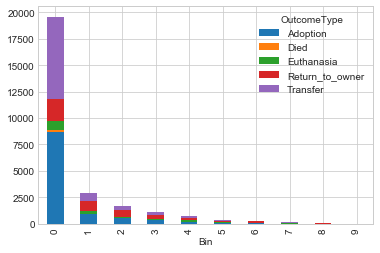

In [82]:
cross.plot(kind='bar', stacked=True)

In [83]:
cross['Total'] = cross.sum(axis=1)
cross

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Total
Bin,,,,,,
0,8682,169,830,2162,7758,19601
1,942,8,219,979,746,2894
2,505,3,147,608,399,1662
3,317,4,92,416,238,1067
4,194,10,107,269,154,734
5,71,2,69,155,63,360
6,41,1,51,117,30,240
7,16,0,28,61,16,121
8,1,0,8,17,1,27


In [93]:
print(values)

[  -7.3  730.  1460.  2190.  2920.  3650.  4380.  5110.  5840.  6570.
 7300. ]


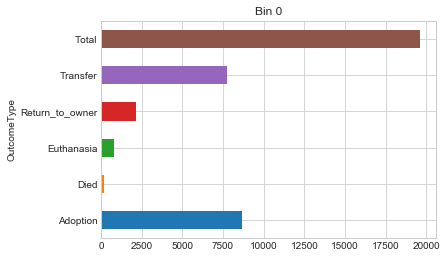

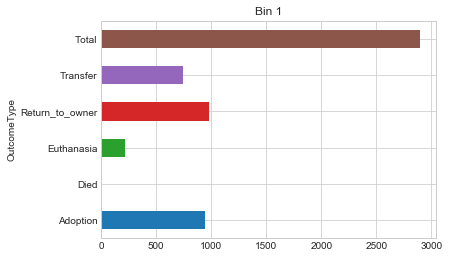

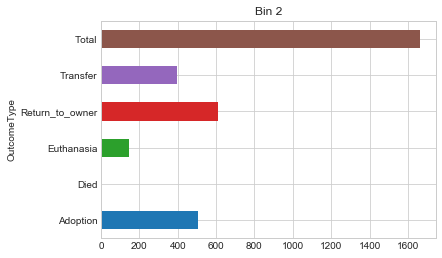

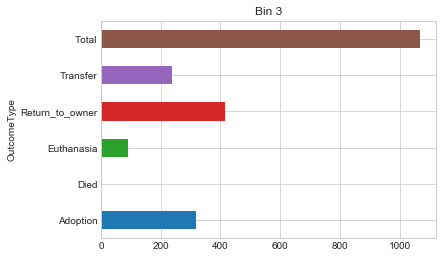

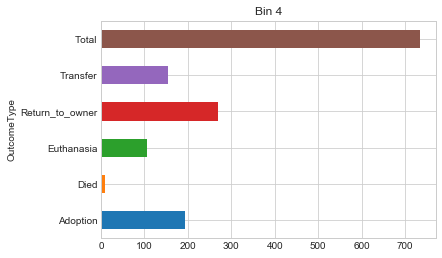

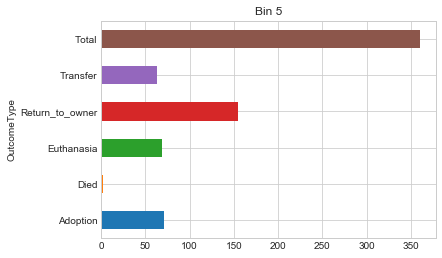

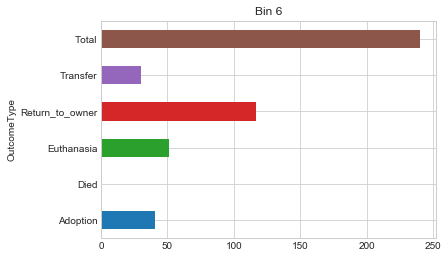

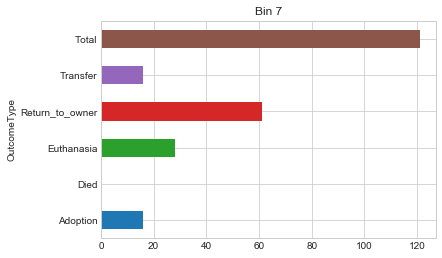

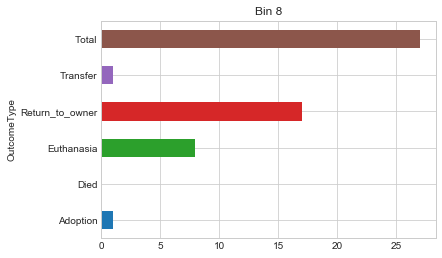

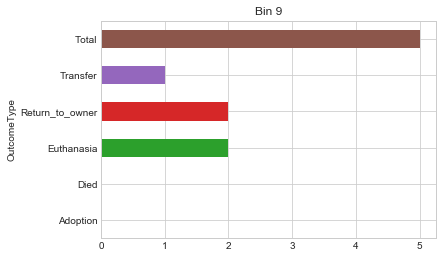

In [92]:
for i in range(cross.shape[0]):
    plt.figure()
    cross.iloc[i].plot(kind='barh')
    plt.title('Bin {}'.format(i))

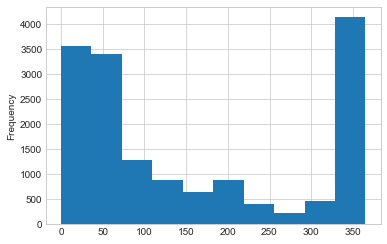

In [100]:
year1 = train[train['NumberOfDays'] <= 365].copy()
year1['NumberOfDays'].plot(kind='hist')

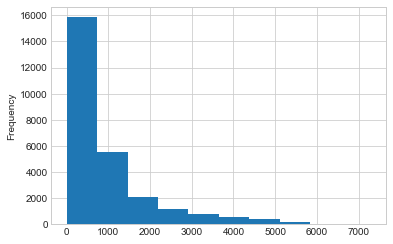

In [104]:
year2 = train[(train['NumberOfDays'] > 365) | (train['NumberOfDays'] < (365 * 2))].copy()
year2['NumberOfDays'].plot(kind='hist')

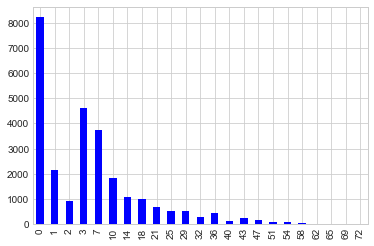

In [24]:
train['Bin'].value_counts().sort_index().plot(kind='bar', color='blue')

In [25]:
train['Bin'].nunique()

23